**this is a template notebook for Assignment 4 on Recommendation. To get a 60 you will need to complete chapter 1.
    The template is also just an indication. You can add more cells if needed, and can of course delete this line**

# <span style ='background:yellow'>\<Title of your notebook>
Author: <span style='background:yellow'>\<Murat Celem\></span><br>
Student number: <span style='background:yellow'>\<642213\></span><br>
Date: <span style='background:yellow'>\<current date\></span>

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* **\<add other packages\>**

From these we will need the following libraries:

In [358]:
#enter here all those 'from .... import ....'


# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
# pandas as pd
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')   
      
import warnings
warnings.filterwarnings('ignore')

# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')

# statsmodels as sm    
try:
    import statsmodels.api as sm
    print('statsmodels already installed, only imported')
except:
    !pip install statsmodels
    import statsmodels.api as sm
    print('statsmodels was not installed, installed and imported')    

NumPy already installed, only imported
pandas already installed, only imported
PyPlot already installed, only imported
statsmodels already installed, only imported


# 1. The Item-Based Recommender

We are going to build an item-based recommender for **<span style='background:yellow'>\<YOUR INPUT (anything except movies)></span>**. In this recommender we could for example **<span style='background:yellow'>\<give a brief description of an example how your recommender would work></span>**.

To begin we'll need to load some data.

In [154]:
# enter code to load your example data file(s)
df = pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


**<span style='background:yellow'>\<explain a bit about the data file(s), if you have multiple and need to merge them, use the code cell below></span>**
   
The dataset is about athletes who participated in various sports events.
The dataset contains information about athletes, such as their personal details (name, gender, age, height, weight), the national team they belong to, the Olympic Games they participated in (year, season, city), the sports they participated in, and the specific events. The dataset also includes information about the medals won by the athletes, if applicable.

In [3]:
# Optional depending on your dataset, enter code to select appropriate columns, and merge the files.


We need one row per user, and his/her scores for each **<span style='background:yellow'>\<YOUR OBJECT></span>**. We can do this by creating a pivot table.

In [372]:
# code to create pivot table

pivot_table = df.pivot_table(index='Year', values='Height',  columns='Sport')
#pivot_table = pd.pivot_table(df, index='Year', values='Height',  columns='Sport')
#pivot_table.head()
pivot_table.head()

Sport,Alpine Skiing,Archery,Art Competitions,Athletics,Badminton,Baseball,Basketball,Beach Volleyball,Biathlon,Bobsleigh,...,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
Year,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,174.875000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.333333,173.500000
1900,NaN,NaN,NaN,178.578947,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,183.333333,NaN,NaN,NaN,NaN,185.000000,NaN,NaN
1904,NaN,169.875,NaN,178.227273,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,183.000000,NaN,NaN,182.750000,NaN,173.000000,172.000000,170.750000
1906,NaN,NaN,NaN,180.352941,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,180.700000,NaN,NaN,173.000000,179.000000
1908,NaN,NaN,NaN,178.305994,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,183.888889,NaN,180.142857,NaN,173.608696


The pivot table displays the average height of athletes, grouped by year and sorted by sport. The rows of the pivot table represent each year, the columns represent each sport, and the values in the table represent the average height of the athletes for each year and each sport.

In other words, you can see the average height of a player for each sport in each year.

We also need to take the counts into consideration so lets keep those into their own dataframe, together with the average score:

In [375]:
# code to make a dataframe with the unique objects, their average score and the number of scores
mySport = pivot_table['Basketball']

myCorrs = pivot_table.corrwith(mySport).sort_values(ascending=False)

corrDf = pd.DataFrame(myCorrs, columns=['Correlation'])
corrDf.dropna(inplace=True)
corrDf.sort_values('Correlation', ascending=False)
corrDf.head()

,Correlation
Sport,
Basketball,1.000000
Softball,0.867810
Beach Volleyball,0.856074
Ski Jumping,0.785542
Rowing,0.765603


To decide on a cut-off point as minimum number of scores to be eligable we can plot the number of scores in a histogram:

<AxesSubplot:>

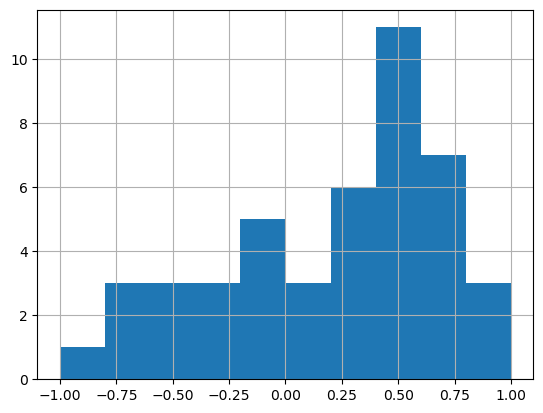

In [332]:
# code to generate the histogram

corrDf['Correlation'].hist(bins=10)


From the histogram we can see that **<span style='background:yellow'>\<Explain in your own words what you notice and what you decide on as the cut-off point, explain why></span>**

    
In the histogram, we see a graph that shows how frequently certain values occur. The x-axis, the horizontal line, ranges from -1 to 1. When examining the graph, we observe that there are many bars between -1 and 0.65. This indicates that there are a significant number of data points falling within this range, and the correlation among these data points is low.

Based on the histogram, I have decided to use a cut-off value of 0.65. This means that we will focus on the data points that are higher than this value and appear to be different from the other data points. We want to avoid potential distortions caused by the remaining data points, so our attention will be directed towards the data above this cut-off value.


Finally we can create the code to perform a recommendation. First we can select one particular **<span style='background:yellow'>\<YOUR OBJECT></span>** =Sport

In [311]:
# code to select one field
corrDf[corrDf['Correlation']>=0.6].head()

,Correlation
Sport,
Basketball,1.000000
Softball,0.867810
Beach Volleyball,0.856074
Ski Jumping,0.785542
Rowing,0.765603


And then to find the recommendation based on the correlations.

In [302]:
# code to create the recommendation
recommended_variable = corrDf['Correlation'].nlargest(2).index[1]

# Print the recommendation
print("Op basis van Basketball is een ander mogelijke sport waar je de juiste lengte voor hebt", recommended_variable)

Op basis van Basketball is een ander mogelijke sport waar je de juiste lengte voor hebt Softball


**<span style='background:yellow'>\<interpret the result></span>**
    
The code selects the rows from the DataFrame corrDf where the value in the "Correlation" column is greater than or equal to 0.6. The resulting DataFrame shows the sports that meet this condition, along with their corresponding correlation values.

Looking at the result, we see that the sport "Basketball" has a perfect correlation of 1.0, which means there is a strong relationship with itself. This is not surprising since comparing basketball with itself would naturally yield a perfect correlation. We also observe high correlations for sports such as "Softball" (0.867810), "Beach Volleyball" (0.856074), "Ski Jumping" (0.785542), and "Rowing" (0.765603).

This suggests that there are significant similarities in terms of average player height between these sports and basketball. The higher the correlation value, the stronger the relationship between the selected sport and the other sports. 

It might be nice to have one simple function that could do all the work for us. It should have as input parameters a dataframe, specific field, and minimum number of ratings, and then returns the recommendation.

Note that you should first select the fields that meet the minimum number of ratings, and then perform the correlation matrix, etc.

In [378]:
# code for a python function

def generate_recommendation(dataframe, specific_field, min_ratings):
    try:
        # Create pivot table
        pivot_table = pd.pivot_table(dataframe, index='Year', values='Height', columns='Sport')

        mySport = pivot_table[specific_field]

        myCorrs = pivot_table.corrwith(mySport).sort_values(ascending=False)

        corrDf = pd.DataFrame(myCorrs, columns=['Correlation'])
        corrDf.dropna(inplace=True)
        corrDf.sort_values('Correlation', ascending=False)
        
        recommended_variable = corrDf['Correlation'].nlargest(2).index[1]
        
        print("Op basis van", specific_field, "is een ander mogelijke sport waar je de juiste lengte voor hebt:", recommended_variable)
    except KeyError:
        print(f"The field '{specific_field}' does not exist in the pivot table. Please check the column names.")


Lets test the function:

In [363]:
# code to test the function
recommended_variable = generate_recommendation(df, 'Ski Jumping', 0.65)
if recommended_variable:
    print("Based on the correlation analysis, the recommended variable is:", recommended_variable)

Op basis van Ski Jumping is een ander mogelijke sport waar je de juiste lengte voor hebt: Volleyball


<font size="5"><center>-----Chapters 1 is required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However no template is available for these chapters. You will have to create it yourself.
    ----</center></font>

# 2. Negative correlations

The recommenders so far used, are looking at what if I give a high rating for this, what do you then recommend me. But how about if I give a low rating for something, what would you then recommend me?

Explain how and why your solution works, and how to interpret the results.

In [379]:
import pandas as pd

def generate_recommendation(dataframe, specific_field, min_ratings):
    try:
        # Create pivot table
        pivot_table = pd.pivot_table(dataframe, index='Year', values='Height', columns='Sport')

        mySport = pivot_table[specific_field]

        myCorrs = pivot_table.corrwith(mySport).sort_values()

        corrDf = pd.DataFrame(myCorrs.abs(), columns=['Correlation'])
        corrDf.dropna(inplace=True)
        corrDf.sort_values('Correlation', ascending=False)

        recommended_variable = corrDf['Correlation'].nsmallest(2).index[1]

        print("Based on low ratings for", specific_field, "a possible sport for which you have a different height is:", recommended_variable)
    except KeyError:
        print(f"The field '{specific_field}' does not exist in the pivot table. Please check the column names.")


In [380]:
# code to test the function
recommended_variable = generate_recommendation(df, 'Ski Jumping', 0.65)
if recommended_variable:
    print("Based on the correlation analysis, the recommended variable is:", recommended_variable)

Based on low ratings for Ski Jumping a possible sport for which you have a different height is: Weightlifting


This solution utilizes a function called generate_recommendation to generate a recommendation based on low ratings for a specific field in a dataframe.

First, a pivot table is created to compare the heights of athletes across different sports over multiple years. Then, the correlation is computed between the specific field and all other sports.

The function selects the sport with the second smallest correlation as a recommendation. This suggests that this sport may have a different height profile compared to the specific sport for which low ratings were given.

Therefore, this recommendation provides an opportunity to explore other sports where the athlete's height may be different based on the given ratings.

# 3. Content Based

Add a chapter showing how a basic content based recommender might work. A starting point for this might be https://www.datacamp.com/community/tutorials/recommender-systems-python (at about 1/3 of the page it starts explaining this in the section called ‘Content based’.

# 4. User Based

Add a chapter showing how a basic user based recommender might work. A starting point for this might be https://realpython.com/build-recommendation-engine-collaborative-filtering/

# 5. Combination

Combine two or more recommendation techniques to get an even better recommendation